In [1]:
# Necessary imports
from random import randint
import matplotlib.pyplot as plt
import random
import math
import pandas as pd
import numpy as np
import re
import emoji
import math
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
#1 Read your Dataset
df = pd.read_csv('Reviews.csv')

In [3]:
#2 Find the dimension of  dataset
print(f'The dimension of the dataset is: {df.shape} \n')

# Read the first 10 rows
print(f'The first 10 rows are: ')
print(f'{df.head(10)} \n')

# Read the last 10 rows
print(f'The last 10 rows are: ')
print(f'{df.tail(10)} \n')

The dimension of the dataset is: (568454, 10) 

The first 10 rows are: 
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
5   6  B006K2ZZ7K   ADT0SRK1MGOEU                   Twoapennything   
6   7  B006K2ZZ7K  A1SP2KVKFXXRU1                David C. Sullivan   
7   8  B006K2ZZ7K  A3JRGQVEQN31IQ               Pamela G. Williams   
8   9  B000E7L2R4  A1MZYO9TZK0BBI                         R. James   
9  10  B00171APVA  A21BT40VZCCYT4                    Carol A. Reed   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                

In [4]:
#3 Show names of columns along with their data types.
print(f'Column names with their data types: \n\n{df.dtypes}\n')

# Missing data in columns
print('Number of missing values per attribute initially:')
print(df.isnull().sum())

# Removing any rows that are NA
df.dropna(inplace=True)

print('\nNumber of missing values after clean:')
print(df.isnull().sum())

Column names with their data types: 

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

Number of missing values per attribute initially:
Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

Number of missing values after clean:
Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
S

In [5]:
#4.Find the levels for Score column and how many samples do we have for each level.
print(f"Levels of Score with number of samples for each level: \n{df['Score'].value_counts().sort_index()}")

Levels of Score with number of samples for each level: 
1     52264
2     29743
3     42638
4     80655
5    363111
Name: Score, dtype: int64


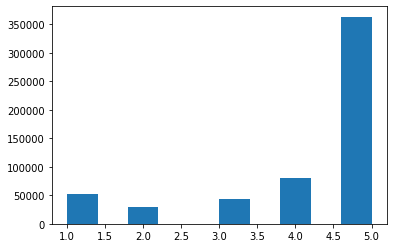

In [6]:
#5. Find the distribution of Score column
plt.hist(df['Score'])
plt.show()


In [7]:
#6. How many words we have per reviews?
data = []
df2 = pd.DataFrame(data, columns=['Word Counts'])
df2['Word Counts'] = df['Text'].str.split().str.len() + df['Summary'].str.split().str.len();
print(df2)
print(f"\nAverage word count per review: {round(df2['Word Counts'].mean())}. Note: This average takes into account both the Summary and Text columns.")

        Word Counts
0                52
1                34
2                98
3                43
4                29
...             ...
568449           30
568450           47
568451           70
568452           40
568453           23

[568411 rows x 1 columns]

Average word count per review: 84. Note: This average takes into account both the Summary and Text columns.


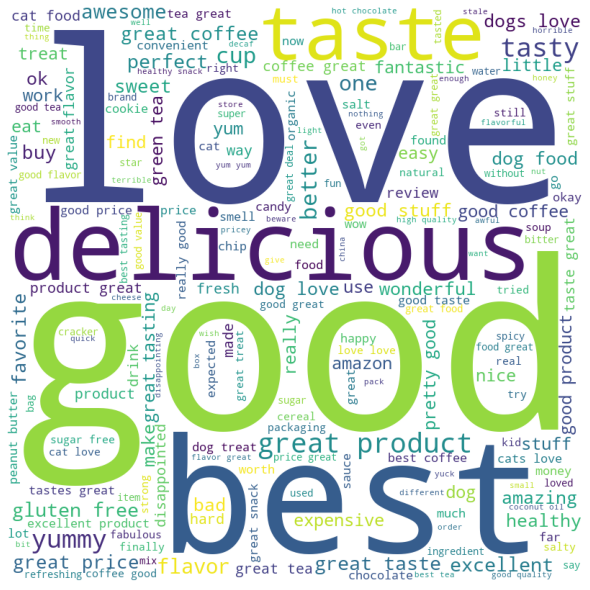

In [8]:
#7 Create a word cloud for the Summary column#
comment_words = ''
stopwords = set(STOPWORDS)
for val in df.Summary:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)                    

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [9]:
#8 Remove URLs, Punctuations and convert emojis to text, convert all text to lowercase
def CleanReviewText(text):
    stringText = str(text)
    filteredText = re.sub(r'<a.*\/a>|<.*?>|(href=")*http[^\s]+|www[^\s]+|[.,*\\!?-]+', r"", stringText)
    emojiFilteredText = emoji.demojize(filteredText)
    emojiFilteredText = emojiFilteredText.lower()
    return emojiFilteredText

df["CleanedReview"] = df['Text'].apply(CleanReviewText)
print("Cleaned Review Dataframe: \n")
print(df.head(5))

Cleaned Review Dataframe: 

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of 

In [10]:
#9 Use TextBlob to find the polarity and subjectivity of each review? Explain your results by reviewing some reviews
def GetSubjectivity(text):
       return TextBlob(text).sentiment.subjectivity
  
 
def GetPolarity(text):
    return TextBlob(text).sentiment.polarity

df["Subjectivity"] = df['CleanedReview'].apply(GetSubjectivity)
df["Polarity"] = df['CleanedReview'].apply(GetPolarity)
print(df)

 #When a sentence is passed into Textblob it gives two outputs, which are polarity and subjectivity. 
 #Polarity is the output that lies between [-1,1], where -1 refers to negative sentiment and +1 refers to positive sentiment.

 #Subjectivity quantifies the amount of personal opinion and factual information contained in the text. 
 #The higher subjectivity means that the text contains personal opinion rather than factual information.

            Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominato

In [11]:
#10 Create a Target column and apply a threshold for score.
def ClassifyScore(score):
    currentScore = int(score)
    return 0 if currentScore <= 2 else 1

df["Target"] = df['Score'].apply(ClassifyScore)
print(df['Target'])

0         1
1         0
2         1
3         0
4         1
         ..
568449    1
568450    0
568451    1
568452    1
568453    1
Name: Target, Length: 568411, dtype: int64


In [12]:
#11 Apply the TF- IDF on your clean review text and consider it as input for your ML model.
v = TfidfVectorizer(stop_words=('english'), max_df=0.8)
vectorizedFeature = v.fit_transform(df['CleanedReview'].apply(lambda x: np.str_(x)))

In [15]:
#12 Create a classifier by using any algorithm you used in your previous assignment. Your final class is the column you created on step 10.
y = df.iloc[: , -1]
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(vectorizedFeature, y, test_size=0.3)


#Create a Decision Trees Classifier
dtc=DecisionTreeClassifier(random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
dtc.fit(X_train, y_train)

y_pred=dtc.predict(X_test)

# Model Accuracy for Decision Trees
print("Accuracy for Decision Tree:", accuracy_score(y_test, y_pred))

# Confusion Matrix for Decision Trees
print("\nConfusion Matrix for Decision Tree:")
print(confusion_matrix(y_test,y_pred))

# Classification Report for Decision Trees
print('\nClassification Report for Decision Tree')
print(classification_report(y_test, y_pred))

Accuracy for Decision Tree: 0.9061187867983392

Confusion Matrix for Decision Tree:
[[ 15882   8556]
 [  7453 138633]]

Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.68      0.65      0.66     24438
           1       0.94      0.95      0.95    146086

    accuracy                           0.91    170524
   macro avg       0.81      0.80      0.81    170524
weighted avg       0.90      0.91      0.91    170524



In [14]:
#13 In a few sentences describe the whole model you created.

# I used a Decision Tree Classifier as my chosen model. 
# The reason I chose this model was based on its performance for binary classification.  
# Decision Trees are good at Binary Classification Tasks. 
# From the results above we can see that its accuracy is good at 91% based on the CleanedResult column being passed 
# which used TF-IDF at predicting the Target column. We can also see other information such as the Confusion Matrix and the Classification Report with metrics such as precision, recall, f1-score, and support. 